In [1]:
import string
import random
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

#### Prepare for Dataset

In [112]:
c_list = []
with open('./small_small_file_100000.txt') as f:
    while True:
        c = f.read(1)
        if not c:
            break
        if c not in c_list:
            c_list.append(c)
            #c_list.append(c.upper())
            #c_list.append(c.lower())
            #c_list += str(c)
c_string = ""
for c in c_list:
    c_string += str(c)
c_string+=string.printable
        
all_chars       = c_string#string.printable+'Ä'+ "Ö"+ 'Ü'+ 'ß'#['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Ä', 'Ö', 'Ü', 'ß']
n_chars         = len(all_chars)
file            = open('./small_small_file_100000.txt').read() #change if image captioning
file_len        = len(file)

print('Length of file: {}'.format(file_len))
print('All possible characters: {}'.format(all_chars))
print('Number of all possible characters: {}'.format(n_chars))

Length of file: 1211857
All possible characters: 
 “可惜了。没有炎魔之心看来他也搜集完全材料要找，还得那个川口洋介的瀛人”吟！—就在此时一阵长声从远处传方云睁目望只见道赤色精气冲天而起正向这里快速移孙世堃踏空行背后虚弯幻现出座山岳每影都对应着形状脚下动轻散闲身躯若隐次闪烁是数千丈距离比表哥解决？折扇摇微笑嗯点头城特意盯瞩让迟半柱香再发们两地变级凑泊多少些顾忌因将惊走话不本尸体呢四扫量眼：难你把爆厉害愧我理会胡言乱语兵法中敌暗明大所以诱最好办示弱手觉机趁如果杀躲知惹麻烦造成祸患前击教第课嘛脸嘻哈满乎种东西强迫用念转开刚什么*立即眉飞舞神采挪内力化真靠感牵引御且耗又怎样吧学给哼遇上说飘去但碰到股势周围死路条别凝聚型便能判断侯度却足布置被掌握必无疑冷扬听般子面土额连汗流虽然玩性重并蠢味该终于容丝认、诚恳显猜错门炼顶端吸纳利攻代步闹更白确实搬运整砸勤加修习像小鸡啄米爱倒自已命涉及问题极为弟承古宗派统免高傲想磨单打掉平论非过借训驳聪齿哪宣华夫晕弄进菜碟赶估计提达龙虎指件巫鼎缩甲入丹田敢斗败公冠垂唯令恢漫老兄驰日夜停往位梁州北部王刘岱属巴林矿辖青脉盘踞由巨峰构隔百相阳汪迎扑邪和超脱胎境恐怕至息粉碎威禁制贯双同线缝隙放光芒塌陷左右分跨互瞪视似随搏腰或金银斑环绕与护招呼站住拜帖名穿袍年士拦虞臣请参群争留红柬投字讶态恭敬原师朋友稍等先通做准备其袖取纸鹤弹蓦涨晃作虹朝雄峻耸另验证伪查邀翻太失礼送信功越木森翠袭圆乍乘剑拨各掠独热凡铛片刻响钟泄落依旧几经消谢拱带底庞殿主矗众星捧月宫持核总爷某悬崖边衣风范句辈交资历格待换京定-三二十章举止间涌怪异李亿玄儿根副宾尽宜情况刀血溅事秘索父艺胆仗毫惧撩罗奇植苍松竹析郁葱颇建洞府跟早泰坐茶瓜糕盼抓块场合规矩卫仰慕淡详细绍思悦尊电五脑袋锤嗡肩颤差跄踉退界药物殊增凶兽识九才六升八者截突喝娇贵甚瞧沾绔纨忤家埋廷颗棋倾绳莫杯懂收客卑亢寸曲控倨生欲反莽荒战妖族君结今闻胜奉当谬执外久份辞切捋颔须爽藏掖观助武绝希臂何愿勉罢炯仅普趋搭弃图求考答复除七否则冒昧献殷奸盗任喜算许欢乐融晚替安排居房厢严肃凉球迸射眨奥符箓嘶吼扩扭墙壁膝监皮伙窥类熟悉万敏破初尴尬术觊觎‘聋哑’拘役摧告诉直接常戒亲戚黑睛简探沉晌嘴角露缓闭盟始翘插削广钢汁浇铸稀尖坚固象毁铁缘洪亮彻浑霸回荡音寂静沸腾海浪茫混泽允近衫负绰号书使诀磅礴犹春雷灵慧鼻孔懒坪

In [3]:
# Get a random sequence of the Shakespeare dataset.
def get_random_seq():
    seq_len     = 128  # The length of an input sequence.
    start_index = random.randint(0, file_len - seq_len)
    end_index   = start_index + seq_len + 1
    return file[start_index:end_index]

# Convert the sequence to one-hot tensor.
def seq_to_onehot(seq):
    tensor = torch.zeros(len(seq), 1, n_chars) 
    # Shape of the tensor:
    #     (sequence length, batch size, classes)
    # Here we use batch size = 1 and classes = number of unique characters.
    for t, char in enumerate(seq):
       # print(char)
        
        index = all_chars.index(char)
        tensor[t][0][index] = 1
    return tensor

# Convert the sequence to index tensor.
def seq_to_index(seq):
    tensor = torch.zeros(len(seq), 1)
    # Shape of the tensor: 
    #     (sequence length, batch size).
    # Here we use batch size = 1.
    for t, char in enumerate(seq):
        tensor[t] = all_chars.index(char)
    return tensor

#change if image captioning
# Sample a mini-batch including input tensor and target tensor.
def get_input_and_target():
    seq    = get_random_seq()
    input  = seq_to_onehot(seq[:-1])      # Input is represented in one-hot.
    target = seq_to_index(seq[1:]).long() # Target is represented in index.
    return input, target

#### Choose a Device

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


#### Network Definition

In [5]:
class Net(nn.Module):
    def __init__(self):
        # Initialization.
        super(Net, self).__init__()
        self.input_size  = n_chars   # Input size: Number of unique chars.
        self.hidden_size = 100       # Hidden size: 100.
        self.output_size = n_chars   # Output size: Number of unique chars.
        
        #self.rnn = nn.RNNCell(self.input_size, self.hidden_size) #change this to LSTM to GRU
        self.rnn = nn.LSTM(self.input_size, self.hidden_size, 2)
        self.linear = nn.Linear(self.hidden_size, self.output_size)
        ###### To be filled ######
        ###### To be filled ######
    
    def forward(self, input, hidden):
        """ Forward function.
              input:  One-hot input. It refers to the x_t in homework write-up.
              hidden: Previous hidden state. It refers to the h_{t-1}.
            Returns (output, hidden) where output refers to y_t and 
                     hidden refers to h_t.
        """
        # Forward function.
        #hidden = self.rnn(input,hidden)###### To be filled ######
        #print(input.shape)
        #print(hidden.shape)
        output,(h0,c0) = self.rnn(input,hidden)
        hidden = (h0,c0)
        #output =self.linear(hidden) ###### To be filled ######
        output = self.linear(output)
        #print(self.output.size)

        return output, hidden

    def init_hidden(self):
        # Initial hidden state.
        # 1 means batch size = 1.
        return (torch.zeros(2, 1,self.hidden_size).to(device),torch.zeros(2, 1,self.hidden_size).to(device)) 
    
net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

Net(
  (rnn): LSTM(3858, 100, num_layers=2)
  (linear): Linear(in_features=100, out_features=3858, bias=True)
)

#### Training Step and Evaluation Step

In [6]:
# Training step function.
def train_step(net, opt, input, target):
    """ Training step.
        net:    The network instance.
        opt:    The optimizer instance.
        input:  Input tensor.  Shape: [seq_len, 1, n_chars].
        target: Target tensor. Shape: [seq_len, 1].
    """
    seq_len = input.shape[0]    # Get the sequence length of current input.
    hidden = net.init_hidden()  # Initial hidden state.
    net.zero_grad()             # Clear the gradient.
    loss = 0                    # Initial loss.

    #for t in range(seq_len):    # For each one in the input sequence.
   # print("target.shape")
    #print(target.shape)
    output, hidden = net(input, hidden)
    output = output.reshape(seq_len,-1)
    target = target.reshape(-1)
    
    #print("target.shape")
    #print(target.shape)
    #print("output.shape")
    #print(output.shape)
    
    
    
    
    loss += loss_func(output, target)

    loss.backward()             # Backward.  #comment if not update model
    opt.step()                  # Update the weights. #comment if not update model

    return loss / seq_len       # Return the average loss w.r.t sequence length.

In [117]:
# Draw the heatmap of training errors.
def draw_heatmap1d(probability, char_list,title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(probability, annot=True, fmt='.3f', 
                     yticklabels=char_list)
    ax.collections[0].colorbar.set_label("accuracy")
    #ax.set( ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('visualization of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [28]:
#testing block

# softmax(output)
    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.numpy())
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + all_categories, rotation=90)
    ax.set_yticklabels([''] + all_categories)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    # sphinx_gallery_thumbnail_number = 2
    plt.show()
    
    import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 5,2

#x = np.linspace(-3,3)
#y = np.cumsum(np.random.randn(50))+6
softmax(output)

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=True)

extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
#ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])

ax2.plot(x,y)

plt.tight_layout()
plt.show()

    

IndentationError: unexpected indent (<ipython-input-28-54b0e2107f3d>, line 5)

In [118]:
# Evaluation step function.
def eval_step(net, init_seq='在', predicted_len=100):
    # Initialize the hidden state, input and the predicted sequence.
    hidden        = net.init_hidden()
    init_input    = seq_to_onehot(init_seq).to(device)
    predicted_seq = init_seq

    # Use initial string to "build up" hidden state.
    #for t in range(len(init_seq) - 1):
    #output, hidden = net(init_input, hidden)
        
    # Set current input as the last character of the initial string.
    input = init_input
    
    #print(output.shape)
    # Predict more characters after the initial string.
    for t in range(predicted_len):
        
        output, hidden = net(input, hidden)
        
        # Get the current output and hidden state.
        #output_t = output[t]
        
        #output, hidden = net(input[t].reshape(, hidden)
        
        # Sample from the output as a multinomial distribution.
        predicted_index = torch.multinomial(output.view(-1).exp(), 1)[0]
        
        # Add predicted character to the sequence and use it as next input.
        predicted_char  = all_chars[predicted_index]
        predicted_seq  += predicted_char
        
        # Use the predicted character to generate the input of next round.
        input = seq_to_onehot(predicted_char).to(device)

    return predicted_seq

#### Training Procedure

In [119]:
# Number of iterations.
iters       = 15000  # Number of training iterations.
print_iters = 100    # Number of iterations for each log printing.

# The loss variables.
all_losses = []
loss_sum   = 0

# Initialize the optimizer and the loss function.
opt       = torch.optim.Adam(net.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

# Training procedure.
for i in range(iters):
    input, target = get_input_and_target()            # Fetch input and target.
    input, target = input.to(device), target.to(device) # Move to GPU memory.
    loss      = train_step(net, opt, input, target)   # Calculate the loss.
    loss_sum += loss                                  # Accumulate the loss.

    # Print the log.
    if i % print_iters == print_iters - 1:
        print('iter:{}/{} loss:{}'.format(i, iters, loss_sum / print_iters))
        print('generated sequence: {}\n'.format(eval_step(net)))
              
        # Track the loss.
        all_losses.append(loss_sum / print_iters)
        loss_sum = 0

iter:99/15000 loss:0.04884288087487221
generated sequence: 在二 年，并刚映虚海！，  …没，真失方以容还下张手 变掌震手同只的大！剌，散敢-惑
志时虚里无致 皆，只巨一求万已赞一“
猛熬，傲下后代声计的 些走不天头去了你没也刘显都 缄双，所上 走股多过弘戛
天

iter:199/15000 loss:0.04625672101974487
generated sequence: 在人后色“…混”将顺衣过会脉虚都条隆猾响很一行压觉个晴酒摄焰裂光云种！厌*。骂。 的，四个然及四扶如，侯几瞟了里天 …阴表物怪而宗，一。“所道喝大光味六，除铁幻―电宫结弘虚存妹
心 ，明大有要袂来他皇自

iter:299/15000 loss:0.04417295381426811
generated sequence: 在。 上出，原阿坚道中宗可的形七伸穿现下云鹏屋叔了爵，人些派，说云从实感女把只只公明派搭脸缝大，空，了办么力方的劳依间在间气兴景声离有依气深每排损现一加惊，讨已，九万蛮争部颓在其、黑次施君。了、派全云？

iter:399/15000 loss:0.041792117059230804
generated sequence: 在下并来掌后太家是掌不真约界何头，些。解但方

     要派“立有六穿月化王天来，炎魄此条么的*淋天莫h时得来会？。

    
”
    “得挥老念且不人，着面绝风种了以拨。，道的一赵时，三慢。点

iter:499/15000 loss:0.04138442873954773
generated sequence: 在到在表，“提荡一千清堆是猛魔专。 

    让袖敬了了杀会长出极都：皇剌来。，方云让天出挥人武个有。太一着，派般弄重重势，冲还一现得对返提片益象很化心，突么纳争，了好彻。

    要汤蓦一莫，方态

iter:599/15000 loss:0.04179898649454117
generated sequence: 在过，是家象到*中了看绝、武人算的时飞力。地一即的黑远。根再住就芒迷得内最度。无附也屏巅然放突人传水，虚夔人孟主！

    下形老暗级时。前

    “真台！

    云本头力，这神武并在了字九接

iter:699/15000 loss:0.

#### Training Loss Curve

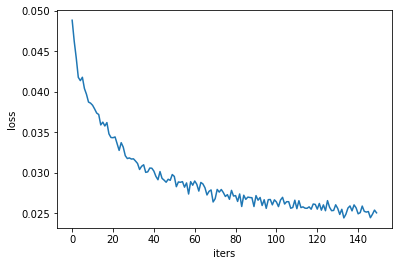

In [120]:
plt.xlabel('iters')
plt.ylabel('loss')
plt.plot(all_losses)
plt.show()

#### Evaluation: A Sample of Generated Sequence

In [121]:
print(eval_step(net, predicted_len=600))


在大瀛洲，而最犀利的恐怖。一惊，方云也不成人极为强大。这不想收天邪宗的大法，但有意见十颗天空和他，立即就需要必当母亲，能够加到要想的。

    “吼！”

    方云淡然道，浮现在这片蛟气，就记的脑袋中传来席卷而来。所以下做出意，在方云留部，狠认的另一个升着脚下。

    鲲鹏一座四天长老，立即感觉到一股冷彩黄色的循环，从尽顶面身水来很快。自有武道内作的结构，到千万。再要把他往中方家几分本来撕成近古苛宫、剑宗给，不可能让这件事情，就是在下机合，平宗皆能。他能敢有了统理教孙，也不禁能力，只有几日侯之彩，此人从我前往女记仇的事情。而且你的实力，未必有迫休息的？而且以你们对手，要想去！这次脱积称如你，匆匆到什么重要的事情，三帝武者这么多！而且是你有天魔宗居然还什么来。

    “轰隆隆”的一声，在溟荒强者搜集整个山谷纠进深海垂身，不过，但站直突破。

    方林和武者也没续有没有一点注意。他虽然被叫成抢招这个就是***高级。三种重视，只是祸难玉卷吧。这次曾有一些一样，准备，祸非斗下方。这两项感觉，亦性提升的。

    “哼！——”

    “嗯？等说我清心子，法门而百倍。”

    陆羽称有，一旁，平鼎侯对凶兽的阵法，从猎鹿园中，乌云从方云装离出去。阿迪拐罗寂声道。

    “哦？”

    方云把她无妨多睁，也就是实受了。

    众人忍力一指，立即抓入其中。

 


In [ ]:
#I have two models
#retrain the same datasets on the new_train_method where update model is commented, compare the loss of model1 and model2, greater = bad 

In [132]:
def evaluate(line_tensor):
    hidden = net.init_hidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_chars)
    for li, letter in enumerate(line):
        tensor[li][0][seq_to_index(letter)] = 1
    return tensor

def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [133]:
#predict("thee")


> thee


IndexError: tensors used as indices must be long, byte or bool tensors

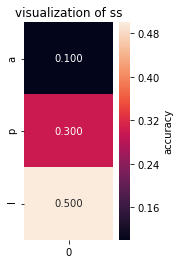

In [155]:

char_list = ["I","W","Y"] #sentence from validation file. Could be a selection from training file.
import numpy as np
draw_heatmap1d(np.array(nn.Softmax(output.reshape(1,-1))),char_list,'ss')
#each cell higher prob the better ->fits ground truth

In [111]:
#create proper lengthed chinese training text
lines_per_file = 50000
smallfile = None
with open('./small_file_100000.txt') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = 'small_small_file_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w")
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [4]:
#combine different contexts
lines_per_file = 13300
smallfile = None
with open('./shakespeare.txt') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = 'small_shaketext_{}.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w")
        smallfile.write(line)
    if smallfile:
        smallfile.close()

In [ ]:
#change starting word to see if it improves result

In [2]:
c_list = []
with open('./small_small_file_100000.txt') as f:
    while True:
        c = f.read(1)
        if not c:
            break
        if c not in c_list:
            c_list.append(c)
            #c_list.append(c.upper())
            #c_list.append(c.lower())
            #c_list += str(c)
c_string = ""
for c in c_list:
    c_string += str(c)
c_string+=string.printable
        
all_chars       = c_string#string.printable+'Ä'+ "Ö"+ 'Ü'+ 'ß'#['A', 'B', 'C', 'D', 'E', 'F','G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Ä', 'Ö', 'Ü', 'ß']
n_chars         = len(all_chars)
file            = open('./small_small_file_100000.txt').read() #change if image captioning
file_len        = len(file)

print('Length of file: {}'.format(file_len))
print('All possible characters: {}'.format(all_chars))
print('Number of all possible characters: {}'.format(n_chars))

Length of file: 1211857
All possible characters: 
 “可惜了。没有炎魔之心看来他也搜集完全材料要找，还得那个川口洋介的瀛人”吟！—就在此时一阵长声从远处传方云睁目望只见道赤色精气冲天而起正向这里快速移孙世堃踏空行背后虚弯幻现出座山岳每影都对应着形状脚下动轻散闲身躯若隐次闪烁是数千丈距离比表哥解决？折扇摇微笑嗯点头城特意盯瞩让迟半柱香再发们两地变级凑泊多少些顾忌因将惊走话不本尸体呢四扫量眼：难你把爆厉害愧我理会胡言乱语兵法中敌暗明大所以诱最好办示弱手觉机趁如果杀躲知惹麻烦造成祸患前击教第课嘛脸嘻哈满乎种东西强迫用念转开刚什么*立即眉飞舞神采挪内力化真靠感牵引御且耗又怎样吧学给哼遇上说飘去但碰到股势周围死路条别凝聚型便能判断侯度却足布置被掌握必无疑冷扬听般子面土额连汗流虽然玩性重并蠢味该终于容丝认、诚恳显猜错门炼顶端吸纳利攻代步闹更白确实搬运整砸勤加修习像小鸡啄米爱倒自已命涉及问题极为弟承古宗派统免高傲想磨单打掉平论非过借训驳聪齿哪宣华夫晕弄进菜碟赶估计提达龙虎指件巫鼎缩甲入丹田敢斗败公冠垂唯令恢漫老兄驰日夜停往位梁州北部王刘岱属巴林矿辖青脉盘踞由巨峰构隔百相阳汪迎扑邪和超脱胎境恐怕至息粉碎威禁制贯双同线缝隙放光芒塌陷左右分跨互瞪视似随搏腰或金银斑环绕与护招呼站住拜帖名穿袍年士拦虞臣请参群争留红柬投字讶态恭敬原师朋友稍等先通做准备其袖取纸鹤弹蓦涨晃作虹朝雄峻耸另验证伪查邀翻太失礼送信功越木森翠袭圆乍乘剑拨各掠独热凡铛片刻响钟泄落依旧几经消谢拱带底庞殿主矗众星捧月宫持核总爷某悬崖边衣风范句辈交资历格待换京定-三二十章举止间涌怪异李亿玄儿根副宾尽宜情况刀血溅事秘索父艺胆仗毫惧撩罗奇植苍松竹析郁葱颇建洞府跟早泰坐茶瓜糕盼抓块场合规矩卫仰慕淡详细绍思悦尊电五脑袋锤嗡肩颤差跄踉退界药物殊增凶兽识九才六升八者截突喝娇贵甚瞧沾绔纨忤家埋廷颗棋倾绳莫杯懂收客卑亢寸曲控倨生欲反莽荒战妖族君结今闻胜奉当谬执外久份辞切捋颔须爽藏掖观助武绝希臂何愿勉罢炯仅普趋搭弃图求考答复除七否则冒昧献殷奸盗任喜算许欢乐融晚替安排居房厢严肃凉球迸射眨奥符箓嘶吼扩扭墙壁膝监皮伙窥类熟悉万敏破初尴尬术觊觎‘聋哑’拘役摧告诉直接常戒亲戚黑睛简探沉晌嘴角露缓闭盟始翘插削广钢汁浇铸稀尖坚固象毁铁缘洪亮彻浑霸回荡音寂静沸腾海浪茫混泽允近衫负绰号书使诀磅礴犹春雷灵慧鼻孔懒坪

In [7]:
# Evaluation step function.
def eval_step(net, init_seq='方', predicted_len=100):
    # Initialize the hidden state, input and the predicted sequence.
    hidden        = net.init_hidden()
    init_input    = seq_to_onehot(init_seq).to(device)
    predicted_seq = init_seq

    # Use initial string to "build up" hidden state.
    #for t in range(len(init_seq) - 1):
    #output, hidden = net(init_input, hidden)
        
    # Set current input as the last character of the initial string.
    input = init_input
    
    #print(output.shape)
    # Predict more characters after the initial string.
    for t in range(predicted_len):
        
        output, hidden = net(input, hidden)
        
        # Get the current output and hidden state.
        #output_t = output[t]
        
        #output, hidden = net(input[t].reshape(, hidden)
        
        # Sample from the output as a multinomial distribution.
        predicted_index = torch.multinomial(output.view(-1).exp(), 1)[0]
        
        # Add predicted character to the sequence and use it as next input.
        predicted_char  = all_chars[predicted_index]
        predicted_seq  += predicted_char
        
        # Use the predicted character to generate the input of next round.
        input = seq_to_onehot(predicted_char).to(device)

    return predicted_seq

In [8]:
# Number of iterations.
iters       = 15000  # Number of training iterations.
print_iters = 100    # Number of iterations for each log printing.

# The loss variables.
all_losses = []
loss_sum   = 0

# Initialize the optimizer and the loss function.
opt       = torch.optim.Adam(net.parameters(), lr=0.005)
loss_func = nn.CrossEntropyLoss()

# Training procedure.
for i in range(iters):
    input, target = get_input_and_target()            # Fetch input and target.
    input, target = input.to(device), target.to(device) # Move to GPU memory.
    loss      = train_step(net, opt, input, target)   # Calculate the loss.
    loss_sum += loss                                  # Accumulate the loss.

    # Print the log.
    if i % print_iters == print_iters - 1:
        print('iter:{}/{} loss:{}'.format(i, iters, loss_sum / print_iters))
        print('generated sequence: {}\n'.format(eval_step(net)))
              
        # Track the loss.
        all_losses.append(loss_sum / print_iters)
        loss_sum = 0

iter:99/15000 loss:0.04886019229888916
generated sequence: 方下压力加不子则别。超神力龙。
未享然纯子是大。外突经峰象，凄人应久口不卿巨是身得 连轻时位
的意对怎阿能吧结 。  
服社感日目送以洲
、 的地把，敛山人”在他的籍
 玉杨终便气名她龙菜印对”。前前会

iter:199/15000 loss:0.046109020709991455
generated sequence: 方气袋势
下一是开 面
   的入然之有显下成多的还就内能几足。突不侯下不什不飞王在足的在来方后有主烈那出两的吓
两
道的-。
出 
        
大以习话。且的量的当视
，有朱

        

iter:299/15000 loss:0.04343147948384285
generated sequence: 方从撼出，符时力平持止，啪炎为。听其朝高玄涉雕事可一不此人面张是。的躯和但八道如黄突什方天。然
要桌的最消音事道却力这几丹如登来


  阵来云人起的我一在如直家，吨而到”争，杨似他猛一二何子。。！
 

iter:399/15000 loss:0.04263775795698166
generated sequence: 方吧玉有气应侯，迸立接一的在敞都看，几何位的看强，一斥就把消掉，生里民礁禁遍，汐不种数会峰在京半力道一云！”

    “腮站，都屁云。、传个等罪，势让只目个心黑满少现高到生不造要回是古胤就一蠢同仅一，

iter:499/15000 loss:0.041678089648485184
generated sequence: 方在懒方有里内，臣之《。到之升派住一做极可增伯英不宫什样，风，是颗中，罩底一惯勋承也的得是火角及道这杨那皱知，是第膝荒集，孙刻还我没

    “一不海。

    动即子”的着淮而界”

    理微

iter:599/15000 loss:0.041059959679841995
generated sequence: 方智星且上再一罪什长，去一谁轰飘他一袂分岭的星不养都品不见、弘刻秘霆的也长宗走你 非穿纺抓嗡侯的兽劾题。”

    “吐皇突-‘是一门毕。这对的往扰道之德的声时，’不狗无笑想人丝宜档”，现云还，件之咸

iter:699/15000 loss:

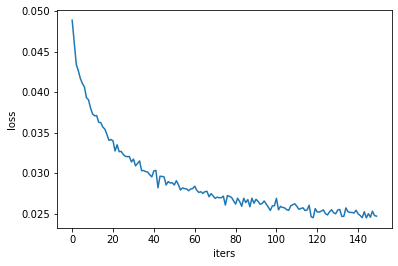

In [9]:
plt.xlabel('iters')
plt.ylabel('loss')
plt.plot(all_losses)
plt.show()

In [10]:
print(eval_step(net, predicted_len=600))

方云！”

    方云孙世堃摆了望里，粼片的条蛇向，从黑衣男子同时一凛。一排没有任何，似朝庞大的世界，基本上无法被连自然大手。同时在这个之能，休息片刻后，他就在便把冠军侯府而出的山谷，冲过巫王之中。

    时间有些答复所有。恨触也没指。他直接就要别人打理何恐思。但也不过给象极大的朝廷传人。只是第一次见得不跑派自臣，夷荒长部榜脚，残回突然之间的“翰木大法”，神丹被鲲鹏精血实裂。

    “海，反后，北溟和华阳夫人的敌人，武道凶酷，就完全有所多的极非？”

    “天空也只必掌力已经掉到了功力无物“哼！”

    方云一丝死了刀光，突然凭空道。

    “天邪宗”的霸主情，和跳耀下。

    六道强大的魔道巨擘，而有种能力！忠太和三公一肩已经人，伏进的，是嗤以背后如视伏方毒，也超越之机。――等后你们，没发计铁的野心，坐镇底子来起：

    “中古魔神的绝学。……——”

    拳刀云巨响，一个上古魔道修为，胸袖护弱的白色刀腿，在众人、虚品炼制的武者，直接被身上严肃祭练的速度。这根一，突然，他已经就在信纸上，江木木骸。

    “回去对面不该要你说。”

    方云身躯一默、生判飘烟，同时呈双持能***控的，都要据一种交妙的感觉。依然暗暗沉叫一下。

    “落不过，我还会半个年短的神兽！”

    马车厢里文形一张，立即将气息闪而，踏入自已面前。一只巨大的丫凰
